In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!cp /content/drive/MyDrive/aiim/BreastCancerMETABRIC.csv ./
!cp /content/drive/MyDrive/aiim/archive.zip ./

In [ ]:
!unzip ./archive.zip

Archive:  ./archive.zip
  inflating: BRCABCR.txt             
  inflating: BRCABEK.txt             
  inflating: BRCACIT.txt             
  inflating: BRCATCGA.txt            
  inflating: BRCAWANG.txt            
  inflating: METABRIC.txt            
  inflating: METABRIC_clinical.txt   
  inflating: RelapseFreeAndGroups.csv  
  inflating: cell_cycle_genes_reactome_extended.txt  
  inflating: code/clintraj_eltree.py  
  inflating: code/clintraj_ml.py     
  inflating: code/clintraj_optiscale.py  
  inflating: code/clintraj_qi.py     
  inflating: code/clintraj_util.py   
  inflating: code/gbrancher.py       


# Read Data

In [ ]:
import numpy as np
import pandas as pd 
import os

df1 = pd.read_csv('./BreastCancerMETABRIC.csv', index_col = 0)

print(f'METABRIC Dataset Shape: {df1.shape}')
print(f'METABRIC Dataset Memory Usage: {df1.memory_usage().sum() / 1024 ** 2:.2f} MB')

df2 = pd.read_csv('./METABRIC.txt', sep = '\t', index_col = 0)
df2 = df2.transpose()
print('Omics data shape', df2.shape)

i2 = [s.replace('BRCA-METABRIC-S1-','') for s in df2.index ]
print('number of common ids:', len(set(i2) & set(df1.index) ) )
df2.index = i2
df = df1.join(df2, how = 'inner')
print('Joined data shape', df2.shape)


METABRIC Dataset Shape: (2509, 33)
METABRIC Dataset Memory Usage: 0.65 MB
Omics data shape (1980, 24360)
number of common ids: 1980
Joined data shape (1980, 24360)


In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df1.columns = df1.columns.str.replace(' ', '_')
df2.columns = df2.columns.str.replace(' ', '_')

In [ ]:
df1

,Age_at_Diagnosis,Type_of_Breast_Surgery,Cancer_Type,Cancer_Type_Detailed,Cellularity,Chemotherapy,Pam50_+_Claudin-low_subtype,Cohort,ER_status_measured_by_IHC,ER_Status,...,Overall_Survival_Status,PR_Status,Radio_Therapy,Relapse_Free_Status_(Months),Relapse_Free_Status,Sex,3-Gene_classifier_subtype,Tumor_Size,Tumor_Stage,Patient's_Vital_Status
Patient ID,,,,,,,,,,,,,,,,,,,,,
MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,Positive,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,Positive,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,Positive,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,Positive,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,Positive,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MTS-T2428,70.05,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,Positive,...,NaN,NaN,NaN,4.93,Recurred,Female,NaN,27.0,1.0,NaN
MTS-T2429,63.60,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,Positive,...,NaN,NaN,NaN,16.18,Recurred,Female,NaN,28.0,2.0,NaN
MTS-T2430,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN


In [ ]:
indices = list(df.index)
df1 = df1.loc[indices]
df1

,Age_at_Diagnosis,Type_of_Breast_Surgery,Cancer_Type,Cancer_Type_Detailed,Cellularity,Chemotherapy,Pam50_+_Claudin-low_subtype,Cohort,ER_status_measured_by_IHC,ER_Status,...,Overall_Survival_Status,PR_Status,Radio_Therapy,Relapse_Free_Status_(Months),Relapse_Free_Status,Sex,3-Gene_classifier_subtype,Tumor_Size,Tumor_Stage,Patient's_Vital_Status
Patient ID,,,,,,,,,,,,,,,,,,,,,
MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,Positive,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,Positive,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,Positive,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,Positive,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,Positive,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-7295,43.10,Breast Conserving,Breast Cancer,Breast Invasive Lobular Carcinoma,High,No,LumA,4.0,Positve,Positive,...,Living,Positive,Yes,194.28,Not Recurred,Female,ER+/HER2- Low Prolif,25.0,NaN,Living
MB-7296,42.88,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumB,4.0,Positve,Positive,...,Deceased,Negative,Yes,16.09,Recurred,Female,NaN,20.0,NaN,Died of Disease
MB-7297,62.90,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumB,4.0,Positve,Positive,...,Deceased,Positive,Yes,121.18,Recurred,Female,NaN,25.0,NaN,Died of Disease


In [ ]:
df.head()

,Age_at_Diagnosis,Type_of_Breast_Surgery,Cancer_Type,Cancer_Type_Detailed,Cellularity,Chemotherapy,Pam50_+_Claudin-low_subtype,Cohort,ER_status_measured_by_IHC,ER_Status,...,VN1R4,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839
MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,Positive,...,5.474224,5.329883,5.745324,7.021679,8.010657,5.299815,6.235804,5.349555,5.947404,5.615147
MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,Positive,...,5.303871,5.384794,5.285060,7.612797,7.988643,5.194247,6.328059,5.469445,6.938685,5.231857
MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,Positive,...,5.370394,5.336455,5.452393,6.619220,8.044471,5.306294,6.306927,5.362207,7.397672,5.372138
MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,Positive,...,5.694697,5.663304,5.529928,6.966482,7.527300,5.197607,6.515638,5.309927,6.175716,5.586521
MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,Positive,...,5.474929,5.799346,5.597297,6.942461,8.115359,5.254136,6.323751,5.518767,6.272568,5.204630


# EDA

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
missing_values = df.isna().sum()
missing_values = missing_values.loc[missing_values > 0]
missing_values

Type_of_Breast_Surgery             25
Cellularity                        63
ER_status_measured_by_IHC          43
Neoplasm_Histologic_Grade          88
Tumor_Other_Histologic_Subtype     44
Primary_Tumor_Laterality          110
Lymph_nodes_examined_positive      76
Mutation_Count                    121
Relapse_Free_Status                 1
3-Gene_classifier_subtype         216
Tumor_Size                         26
Tumor_Stage                       514
Patient's_Vital_Status              1
dtype: int64

In [ ]:
df1["Patient's_Vital_Status"].value_counts()

Living                  837
Died of Disease         646
Died of Other Causes    496
Name: Patient's_Vital_Status, dtype: int64

In [ ]:
df1['Cohort'].value_counts()

3.0    763
1.0    521
2.0    288
4.0    238
5.0    170
Name: Cohort, dtype: int64

In [ ]:
df['3-Gene_classifier_subtype'].value_counts()

ER+/HER2- Low Prolif     640
ER+/HER2- High Prolif    617
ER-/HER2-                309
HER2+                    198
Name: 3-Gene_classifier_subtype, dtype: int64

In [ ]:
df['Neoplasm_Histologic_Grade'].value_counts()

3.0    952
2.0    771
1.0    169
Name: Neoplasm_Histologic_Grade, dtype: int64

In [ ]:
df['ER_Status'].value_counts()

Positive    1506
Negative     474
Name: ER_Status, dtype: int64

In [ ]:
print("nan   ", df['Tumor_Stage'].isna().sum())
df['Tumor_Stage'].value_counts()

nan    514


2.0    825
1.0    501
3.0    118
0.0     12
4.0     10
Name: Tumor_Stage, dtype: int64

In [ ]:
df1.columns

Index(['Age_at_Diagnosis', 'Type_of_Breast_Surgery', 'Cancer_Type',
       'Cancer_Type_Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50_+_Claudin-low_subtype', 'Cohort', 'ER_status_measured_by_IHC',
       'ER_Status', 'Neoplasm_Histologic_Grade',
       'HER2_status_measured_by_SNP6', 'HER2_Status',
       'Tumor_Other_Histologic_Subtype', 'Hormone_Therapy',
       'Inferred_Menopausal_State', 'Integrative_Cluster',
       'Primary_Tumor_Laterality', 'Lymph_nodes_examined_positive',
       'Mutation_Count', 'Nottingham_prognostic_index', 'Oncotree_Code',
       'Overall_Survival_(Months)', 'Overall_Survival_Status', 'PR_Status',
       'Radio_Therapy', 'Relapse_Free_Status_(Months)', 'Relapse_Free_Status',
       'Sex', '3-Gene_classifier_subtype', 'Tumor_Size', 'Tumor_Stage',
       'Patient's_Vital_Status'],
      dtype='object')

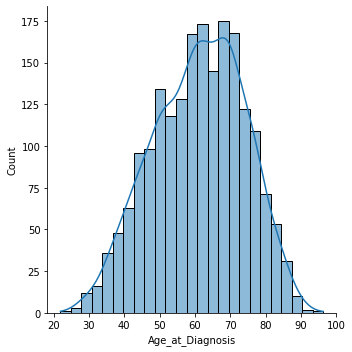

In [ ]:
sns.displot(df, x='Age_at_Diagnosis', kde=True)

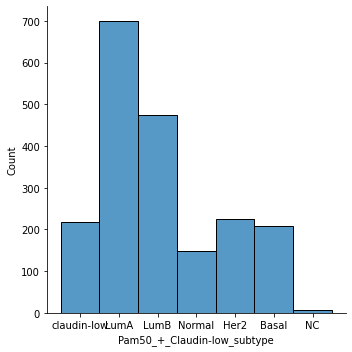

In [ ]:
sns.displot(df, x = 'Pam50_+_Claudin-low_subtype')

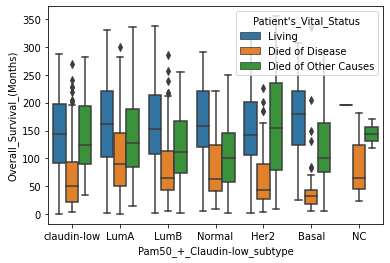

In [ ]:
sns.boxplot(
    data=df,
    y = 'Overall_Survival_(Months)',
    x = 'Pam50_+_Claudin-low_subtype',
    hue="Patient's_Vital_Status",
)

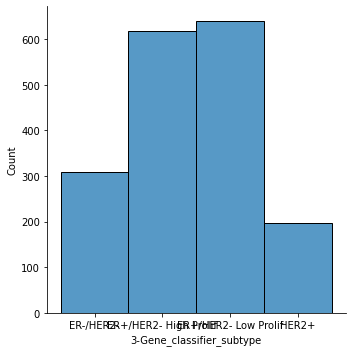

In [ ]:
sns.displot(df, x = "3-Gene_classifier_subtype")

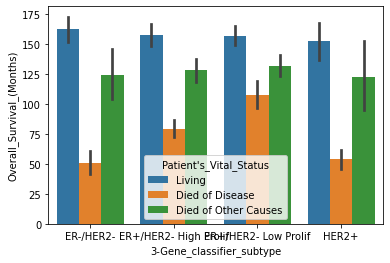

In [ ]:
sns.barplot(
    data=df,
    y = 'Overall_Survival_(Months)',
    x = "3-Gene_classifier_subtype",
    hue="Patient's_Vital_Status",
)

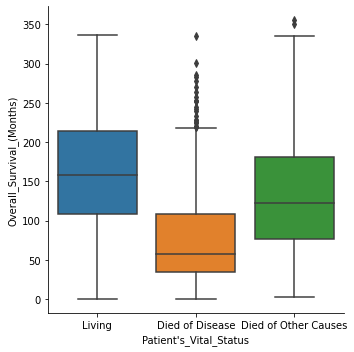

In [ ]:
sns.catplot(data = df, y = 'Overall_Survival_(Months)', x = "Patient's_Vital_Status", kind = 'box')

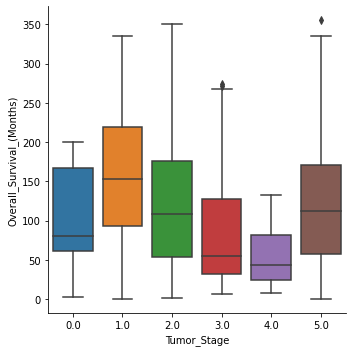

In [ ]:
tmp = df
tmp['Tumor_Stage'] = np.where(pd.isna(tmp['Tumor_Stage']), 5, tmp['Tumor_Stage'])
sns.catplot(data = tmp, y = 'Overall_Survival_(Months)', x = "Tumor_Stage", kind = 'box')

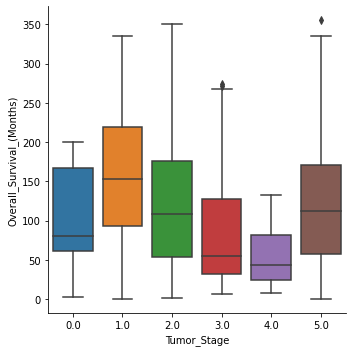

In [ ]:
sns.catplot(data = df, y = 'Overall_Survival_(Months)', x = "Tumor_Stage", kind = 'box')

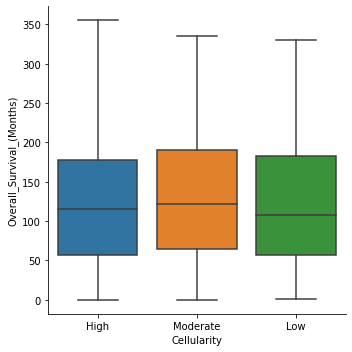

In [ ]:
sns.catplot(data = df, y = 'Overall_Survival_(Months)', x = "Cellularity", kind = 'box')

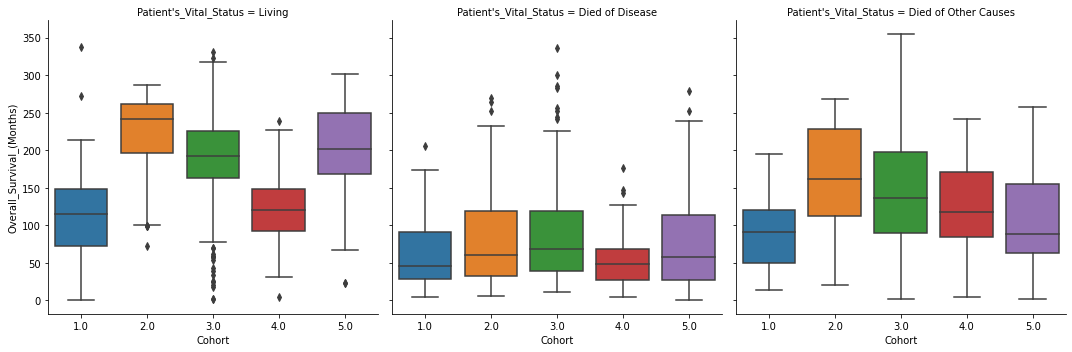

In [ ]:
sns.catplot(data = df, y = 'Overall_Survival_(Months)', x = "Cohort", col = "Patient's_Vital_Status", kind = 'box')

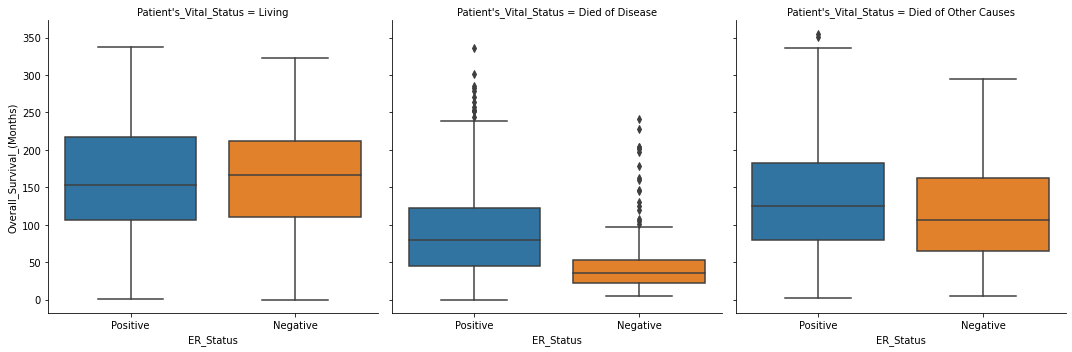

In [ ]:
sns.catplot(data = df, y = 'Overall_Survival_(Months)', x = "ER_Status", col = "Patient's_Vital_Status", kind = 'box')

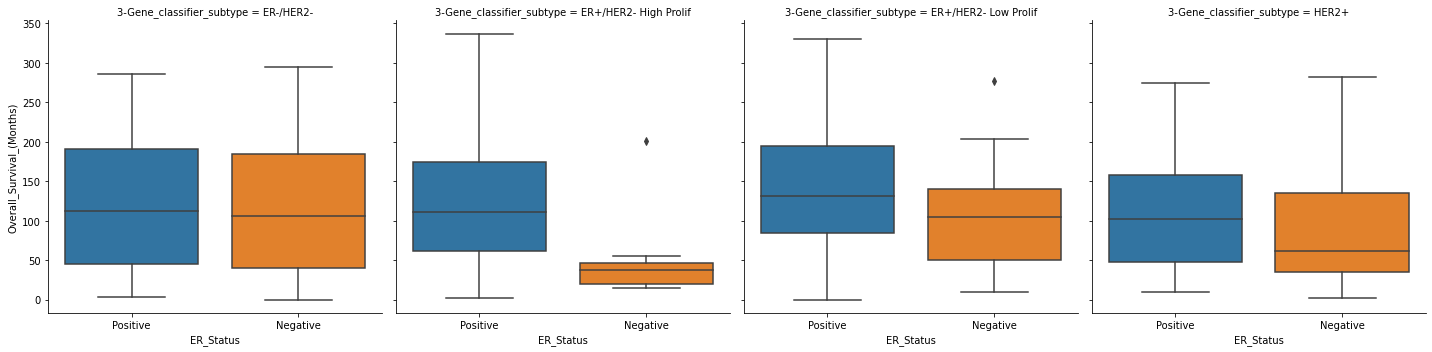

In [ ]:
sns.catplot(data = df, y = 'Overall_Survival_(Months)', x = "ER_Status", col = "3-Gene_classifier_subtype", kind = 'box')

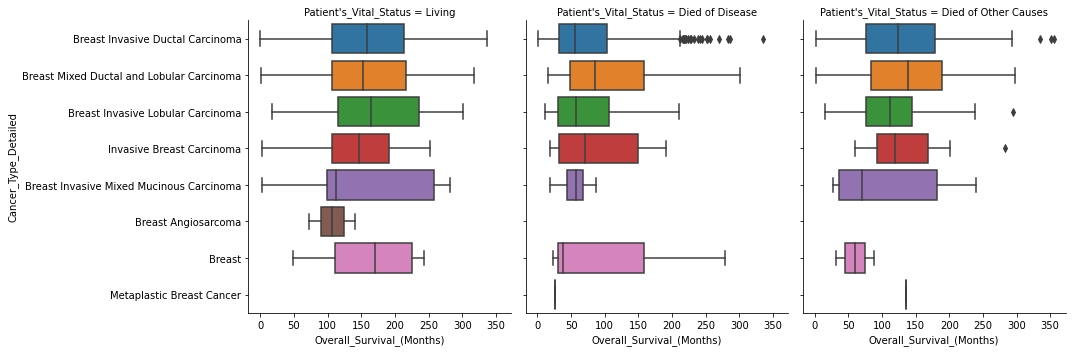

In [ ]:
sns.catplot(data = df, x = 'Overall_Survival_(Months)', y = "Cancer_Type_Detailed", col = "Patient's_Vital_Status", kind = 'box')

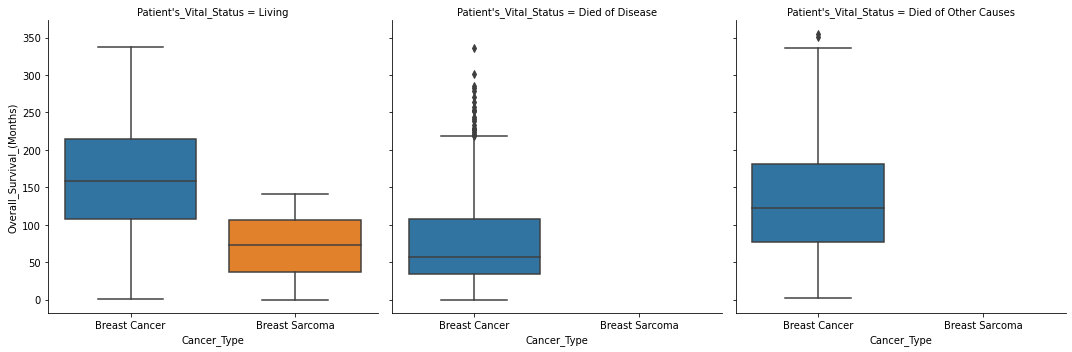

In [ ]:
sns.catplot(data = df, y = 'Overall_Survival_(Months)', x = "Cancer_Type", col = "Patient's_Vital_Status", kind = 'box')

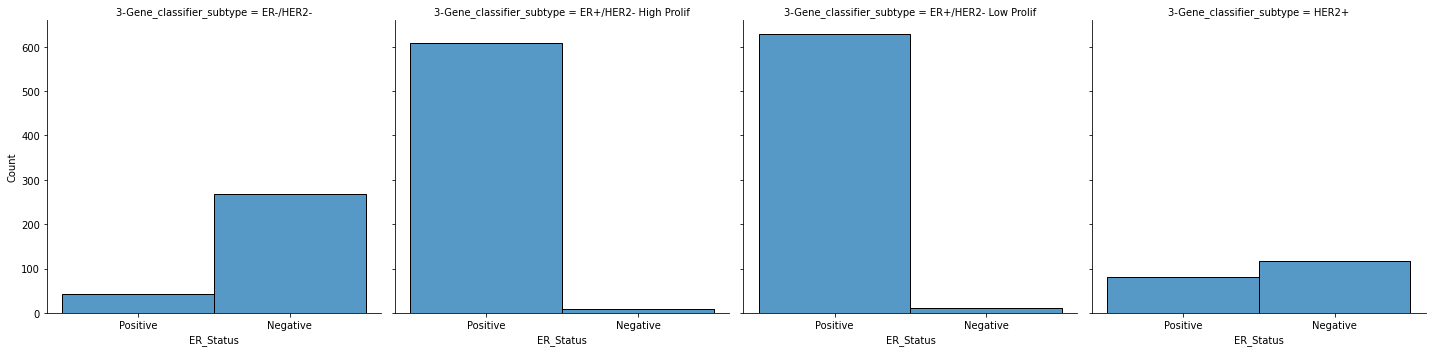

In [ ]:
sns.displot(df, x='ER_Status',col = '3-Gene_classifier_subtype', kde=False)

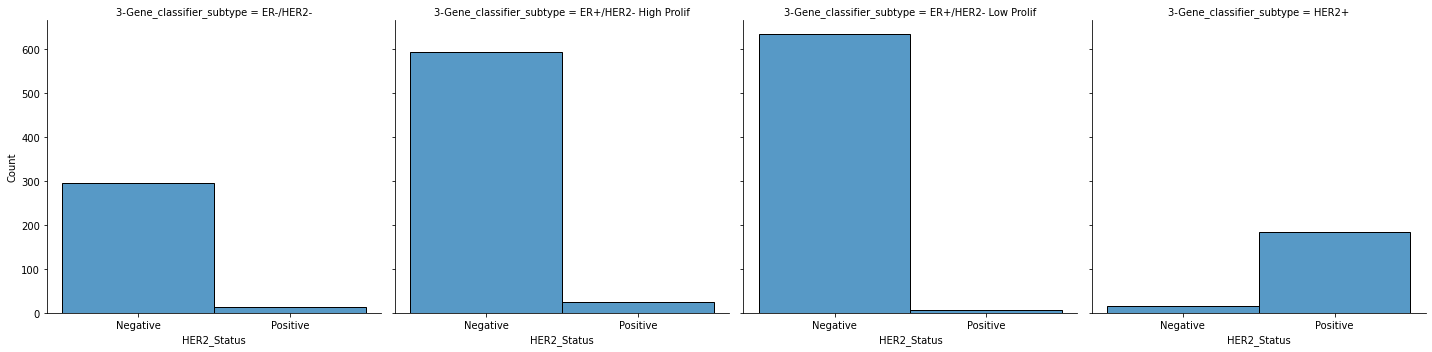

In [ ]:
sns.displot(df, x='HER2_Status',col = '3-Gene_classifier_subtype', kde=False)

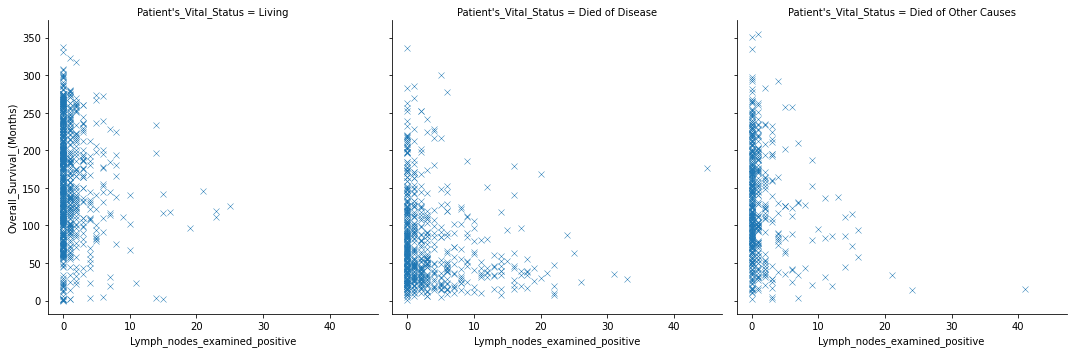

In [ ]:
sns.relplot(data=df, y = 'Overall_Survival_(Months)', x = "Lymph_nodes_examined_positive", col = "Patient's_Vital_Status", kind = 'scatter', marker='x')

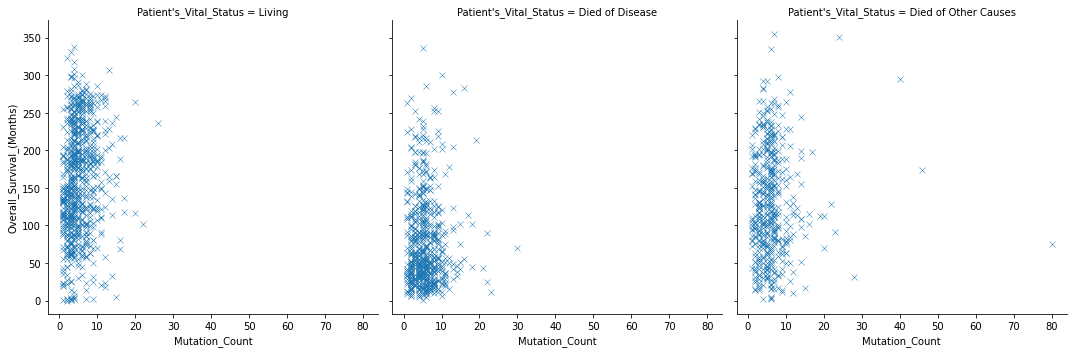

In [ ]:
sns.relplot(data=df, y = 'Overall_Survival_(Months)', x = "Mutation_Count", col = "Patient's_Vital_Status", kind = 'scatter', marker = 'x')

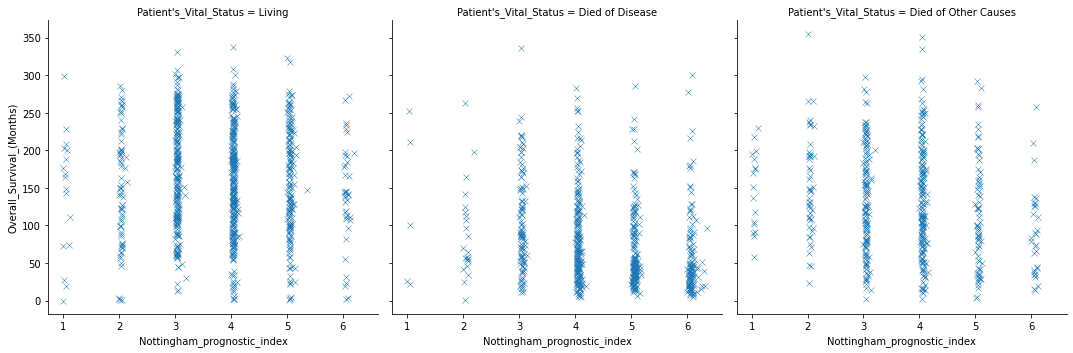

In [ ]:
sns.relplot(data=df, y = 'Overall_Survival_(Months)', x = "Nottingham_prognostic_index", col = "Patient's_Vital_Status", marker = 'x')

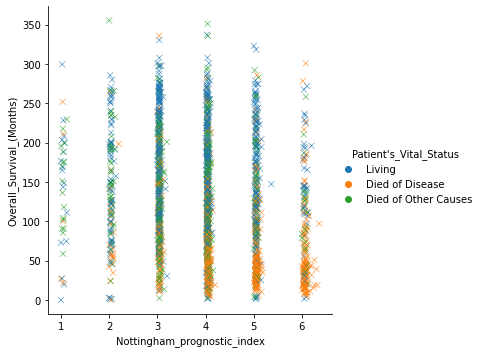

In [ ]:
sns.relplot(
    data=df,
    y = 'Overall_Survival_(Months)',
    x = "Nottingham_prognostic_index",
    hue="Patient's_Vital_Status",
    marker = 'x'
)

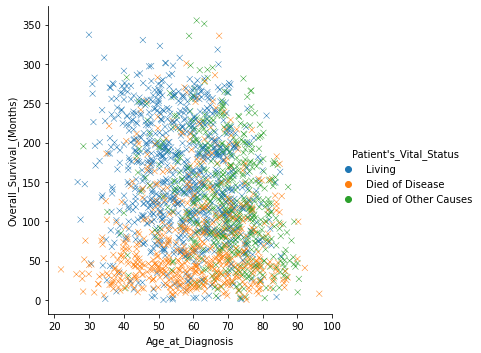

In [ ]:
sns.relplot(
    data=df,
    y = 'Overall_Survival_(Months)',
    x = "Age_at_Diagnosis",
    hue="Patient's_Vital_Status",
    marker = 'x'
)

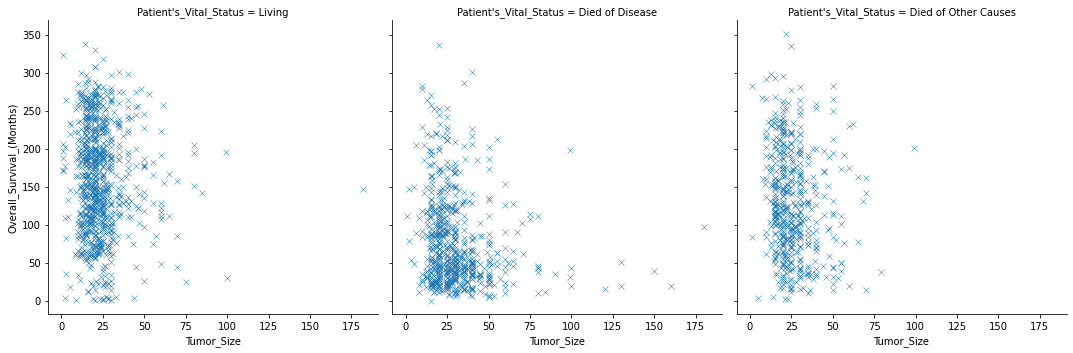

In [ ]:
sns.relplot(
    data=df,
    y = 'Overall_Survival_(Months)',
    x = "Tumor_Size",
    col="Patient's_Vital_Status",
    marker = 'x'
)

# Preprocess data

In [ ]:
df1.columns

Index(['Age_at_Diagnosis', 'Type_of_Breast_Surgery', 'Cancer_Type',
       'Cancer_Type_Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50_+_Claudin-low_subtype', 'Cohort', 'ER_status_measured_by_IHC',
       'ER_Status', 'Neoplasm_Histologic_Grade',
       'HER2_status_measured_by_SNP6', 'HER2_Status',
       'Tumor_Other_Histologic_Subtype', 'Hormone_Therapy',
       'Inferred_Menopausal_State', 'Integrative_Cluster',
       'Primary_Tumor_Laterality', 'Lymph_nodes_examined_positive',
       'Mutation_Count', 'Nottingham_prognostic_index', 'Oncotree_Code',
       'Overall_Survival_(Months)', 'Overall_Survival_Status', 'PR_Status',
       'Radio_Therapy', 'Relapse_Free_Status_(Months)', 'Relapse_Free_Status',
       'Sex', '3-Gene_classifier_subtype', 'Tumor_Size', 'Tumor_Stage',
       'Patient's_Vital_Status'],
      dtype='object')

## clean unused

In [ ]:
def delete_unused_cols(df):
    delete_cols = ['Tumor_Other_Histologic_Subtype', 'ER_status_measured_by_IHC']
    df.drop(columns = delete_cols, inplace=True)
    return df

## drop na

In [ ]:
def drop_poor_na(df):
    drop_cols = ["Patient's_Vital_Status", ]
    df.dropna(subset = drop_cols, inplace= True)
    return df

## Make survival column

In [ ]:
def make_survival_column(df):
    df['Survival'] = np.where((df["Patient's_Vital_Status"] == 'Living'), 1, 0)
    df['Died_of_Disease'] = np.where((df["Patient's_Vital_Status"] == 'Died of Disease'), 1, 0)
    df['Overall_Survival_over_five'] = np.where(df["Overall_Survival_(Months)"] > 60, 1, 0)
    df['Died_of_Disease_within_five_year'] = np.where((df["Overall_Survival_over_five"] == 0) & (df['Died_of_Disease'] == 1), 1, 0)
    return df

## separated out living and not longer than 5 years

In [ ]:
def separated_too_short(df):
    un_supervised = df.loc[(df['Survival'] == 1) & (df['Overall_Survival_over_five'] == 0)]

    df = df.loc[(df['Survival'] == 1) | (df['Died_of_Disease'] == 1) | (df['Overall_Survival_over_five'] == 1)]
    ########
    un_supervised.to_csv('un_supervised.csv')

    ########
    return df

## label encoding

In [ ]:

Type_of_Breast_Surgery2label = {c: i for i, c in enumerate(df['Type_of_Breast_Surgery'].unique())}
Cancer_Type2label = {c: i for i, c in enumerate(df['Cancer_Type'].unique())}
Cancer_Type_Detailed2label = {c: i for i, c in enumerate(df['Cancer_Type_Detailed'].unique())}
Cellularity2label = {c: i for i, c in enumerate(df['Cellularity'].unique())}
Chemotherapy2label = {c: i for i, c in enumerate(df['Chemotherapy'].unique())}
Pam50Claudinlow_subtype2label = {c: i for i, c in enumerate(df['Pam50_+_Claudin-low_subtype'].unique())}
ER_Status2label = {c: i for i, c in enumerate(df['ER_Status'].unique())}
HER2_status_measured_by_SNP62label = {c: i for i, c in enumerate(df['HER2_status_measured_by_SNP6'].unique())}
HER2_Status2label = {c: i for i, c in enumerate(df['HER2_Status'].unique())}
Hormone_Therapy2label = {c: i for i, c in enumerate(df['Hormone_Therapy'].unique())}
Inferred_Menopausal_State2label = {c: i for i, c in enumerate(df['Inferred_Menopausal_State'].unique())}
Integrative_Cluster2label = {c: i for i, c in enumerate(df['Integrative_Cluster'].unique())}
Primary_Tumor_Laterality2label = {c: i for i, c in enumerate(df['Primary_Tumor_Laterality'].unique())}
Oncotree_Code2label = {c: i for i, c in enumerate(df['Oncotree_Code'].unique())}
Overall_Survival_Status2label = {c: i for i, c in enumerate(df['Overall_Survival_Status'].unique())}
PR_Status2label = {c: i for i, c in enumerate(df['PR_Status'].unique())}
Radio_Therapy2label = {c: i for i, c in enumerate(df['Radio_Therapy'].unique())}
Relapse_Free_Status2label = {c: i for i, c in enumerate(df['Relapse_Free_Status'].unique())}
Sex2label = {c: i for i, c in enumerate(df['Sex'].unique())}
Three_Gene_classifier_subtype2label = {c: i for i, c in enumerate(df['3-Gene_classifier_subtype'].unique())}

label2Type_of_Breast_Surgery = dict((v,k) for k,v in Type_of_Breast_Surgery2label.items())
label2Cancer_Type = dict((v,k) for k,v in Cancer_Type2label.items())
label2Cancer_Type_Detailed = dict((v,k) for k,v in Cancer_Type_Detailed2label.items())
label2Cellularity = dict((v,k) for k,v in Cellularity2label.items())
label2Pam50Claudinlow_subtype = dict((v,k) for k,v in Pam50Claudinlow_subtype2label.items())
label2Chemotherapy = dict((v,k) for k,v in Chemotherapy2label.items())
label2ER_Status = dict((v,k) for k,v in ER_Status2label.items())
label2HER2_status_measured_by_SNP6 = dict((v,k) for k,v in HER2_status_measured_by_SNP62label.items())
label2HER2_Status = dict((v,k) for k,v in HER2_Status2label.items())
label2Hormone_Therapy = dict((v,k) for k,v in Hormone_Therapy2label.items())
label2Inferred_Menopausal_State = dict((v,k) for k,v in Inferred_Menopausal_State2label.items())
label2Integrative_Cluster = dict((v,k) for k,v in Integrative_Cluster2label.items())
label2Primary_Tumor_Laterality = dict((v,k) for k,v in Primary_Tumor_Laterality2label.items())
label2Oncotree_Code = dict((v,k) for k,v in Oncotree_Code2label.items())
label2Overall_Survival_Status = dict((v,k) for k,v in Overall_Survival_Status2label.items())
label2PR_Status = dict((v,k) for k,v in PR_Status2label.items())
label2Radio_Therapy = dict((v,k) for k,v in Radio_Therapy2label.items())
label2Relapse_Free_Status = dict((v,k) for k,v in Relapse_Free_Status2label.items())
label2Sex = dict((v,k) for k,v in Sex2label.items())
label2Three_Gene_classifier_subtype = dict((v,k) for k,v in Three_Gene_classifier_subtype2label.items())

def do_label_encoding(df):
    df['label_Type_of_Breast_Surgery'] = df['Type_of_Breast_Surgery'].map(Type_of_Breast_Surgery2label)
    df['label_Cancer_Type'] = df['Cancer_Type'].map(Cancer_Type2label)
    df['label_Cancer_Type_Detailed'] = df['Cancer_Type_Detailed'].map(Cancer_Type_Detailed2label)
    df['label_Cellularity'] = df['Cellularity'].map(Cellularity2label)
    df['label_Pam50_+_Claudin-low_subtype'] = df['Pam50_+_Claudin-low_subtype'].map(Pam50Claudinlow_subtype2label)
    df['label_Chemotherapy'] = df['Chemotherapy'].map(Chemotherapy2label)
    df['label_ER_Status'] = df['ER_Status'].map(ER_Status2label)
    df['label_HER2_status_measured_by_SNP6'] = df['HER2_status_measured_by_SNP6'].map(HER2_status_measured_by_SNP62label)
    df['label_HER2_Status'] = df['HER2_Status'].map(HER2_Status2label)
    df['label_Hormone_Therapy'] = df['Hormone_Therapy'].map(Hormone_Therapy2label)
    df['label_Inferred_Menopausal_State'] = df['Inferred_Menopausal_State'].map(Inferred_Menopausal_State2label)
    df['label_Integrative_Cluster'] = df['Integrative_Cluster'].map(Integrative_Cluster2label)
    df['label_Primary_Tumor_Laterality'] = df['Primary_Tumor_Laterality'].map(Primary_Tumor_Laterality2label)
    df['label_Oncotree_Code'] = df['Oncotree_Code'].map(Oncotree_Code2label)
    df['label_Overall_Survival_Status'] = df['Overall_Survival_Status'].map(Overall_Survival_Status2label)
    df['label_PR_Status'] = df['PR_Status'].map(PR_Status2label)
    df['label_Radio_Therapy'] = df['Radio_Therapy'].map(Radio_Therapy2label)
    df['label_Relapse_Free_Status'] = df['Relapse_Free_Status'].map(Relapse_Free_Status2label)
    df['label_Sex'] = df['Sex'].map(Sex2label)
    df['label_Three_Gene_classifier_subtype'] = df['3-Gene_classifier_subtype'].map(Three_Gene_classifier_subtype2label)
    return df

# Do the preprocessing

In [ ]:
#df = delete_unused_cols(df)
df = drop_poor_na(df)
print(df.shape)
df = make_survival_column(df)
print(df.shape)
df = do_label_encoding(df)
print(df.shape)
#######

df = separated_too_short(df)
print(df.shape)
#######

(1979, 24393)
(1979, 24397)
(1979, 24417)
(1889, 24417)


In [ ]:
df.columns

Index(['Age_at_Diagnosis', 'Type_of_Breast_Surgery', 'Cancer_Type',
       'Cancer_Type_Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50_+_Claudin-low_subtype', 'Cohort', 'ER_status_measured_by_IHC',
       'ER_Status',
       ...
       'label_Inferred_Menopausal_State', 'label_Integrative_Cluster',
       'label_Primary_Tumor_Laterality', 'label_Oncotree_Code',
       'label_Overall_Survival_Status', 'label_PR_Status',
       'label_Radio_Therapy', 'label_Relapse_Free_Status', 'label_Sex',
       'label_Three_Gene_classifier_subtype'],
      dtype='object', length=24417)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=30, stratify=df[['Died_of_Disease_within_five_year']])


In [ ]:
# train_df.to_csv('/content/drive/MyDrive/aiim/train_breast_cancer.csv')
# test_df.to_csv('/content/drive/MyDrive/aiim/test_breast_cancer.csv')

# Feature Selection

In [ ]:
df2.columns

Index(['RERE', 'RNF165', 'CD049690', 'BC033982', 'PHF7', 'CIDEA', 'PAPD4',
       'AI082173', 'SLC17A3', 'SDS',
       ...
       'VN1R4', 'BX115874', 'BX107598', 'UGCGL1', 'VPS72', 'CSMD3', 'CC2D1A',
       'CB986545', 'IGSF9', 'DA110839'],
      dtype='object', name='Hugo_Symbol', length=24360)

In [ ]:
features_cols = ['label_ER_Status', 'label_HER2_Status', 'label_PR_Status'] + list(df2.columns)

In [ ]:
ESR_matching = [x for x in features_cols if "ESR1" in x]
ESR_matching

['ESR1']

In [ ]:
MUC_matching = [x for x in features_cols if x == "MUC1"]
MUC_matching

['MUC1']

In [ ]:
PGR_matching = [x for x in features_cols if x == "PGR"]
PGR_matching

['PGR']

In [ ]:
ERBB2_matching = [x for x in features_cols if x == "ERBB2"]
ERBB2_matching

['ERBB2']

In [ ]:
brca_matching = [x for x in features_cols if "BRCA" in x]
brca_matching

['BRCA2', 'BRCA1']

In [ ]:
mki_matching = [x for x in features_cols if "MKI67" in x]
mki_matching

['MKI67', 'MKI67IP']

In [ ]:
plau_matching = [x for x in features_cols if "PLAU" in x]
plau_matching

['PLAU', 'PLAUR']

In [ ]:
bio_markers = ['label_ER_Status', 'label_HER2_Status', 'label_PR_Status'] + brca_matching + mki_matching + plau_matching + ESR_matching + MUC_matching + PGR_matching + ERBB2_matching

## Do Welch’s t-Test, Pearson Correlation

In [ ]:
len(df2.columns)

24360

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
picked_gene = set(bio_markers)

for x in bio_markers:
    print(x)
    #print(len(df[x].value_counts()))
    num_type = len(df[x].value_counts())
    #x = 'BRCA1'
    scores = {}
    for y in features_cols:

        if num_type == 2:

            data_group1 = np.array(train_df.loc[(train_df[x] == 1), y].values)
            data_group2 = np.array(train_df.loc[(train_df[x] == 0), y].values)

            tmp = stats.ttest_ind(data_group1, data_group2, equal_var = False)

            scores[y] = tmp.pvalue

        else:

            data_group1 = np.array(train_df[x].values)
            data_group2 = np.array(train_df[y].values)
            tmp = np.corrcoef(data_group1, data_group2)

            scores[y] = tmp[0][1]

    scores = sorted(scores.items(), key=lambda x: np.abs(x[1]), reverse=True)
    print([scores[x][1] for x in range(15)])
    print([scores[x][0] for x in range(15)])
    scores = [scores[x][0] for x in range(5)]

    picked_gene |= set(scores)
    #print(len(picked_gene))

picked_gene = list(picked_gene)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


label_ER_Status
[0.9999823561781234, 0.9999064761130707, 0.9998129861537126, 0.9997462797922467, 0.9996496285833623, 0.9994725934998964, 0.9992646991106129, 0.9991920529467946, 0.9990304833249048, 0.9990053359644845, 0.9989811240657692, 0.9987979734321923, 0.9987781034170836, 0.9987198844845646, 0.9986747519919766]
['C19orf22', 'KIF7', 'LMBR1', 'ART5', 'VN1R4', 'BX118161', 'DB336446', 'LCE2C', 'AA507820', 'AA548739', 'OR5T1', 'ZNF408', 'BE044484', 'OR56B1', 'TAS2R39']
label_HER2_Status
[0.9999713861796395, 0.9999571481567213, 0.9999503102560495, 0.9997850856834654, 0.9996185650414487, 0.9996026792277272, 0.9994965349259921, 0.9994889220062542, 0.9994313623316619, 0.9993788257374093, 0.9991965784772172, 0.9991217219112173, 0.9991151548016326, 0.9990993410717269, 0.9989859056517394]
['C9orf43', 'R00495', 'HS3ST4', 'KRTAP5-6', 'BX113107', 'C14orf165', 'TP63', 'NR1I2', 'AA420798', 'OR10H1', 'NANOGP1', 'AA507704', 'GINS1', 'BU753943', 'RAP1GDS1']
label_PR_Status
[0.9999653446080236, 0.99985

# Training 

## Survive Classification

### lgbm

In [ ]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgbm
import pickle
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
num_folds = 5

skf = StratifiedKFold(n_splits=num_folds, random_state=None, shuffle=False)

features_cols = picked_gene

params = {
    'learning_rate' : 0.1,
    'n_estimators' : 1024,
    'num_leaves' : 32,
    'max_depth' : -1
}

train_aucs = []
train_accs = []
valid_aucs = []
valid_accs = []




for n_fold, (train_index, test_index) in enumerate(skf.split(train_df[picked_gene], train_df['Died_of_Disease_within_five_year'])):
    # x_train, x_valid = train_df.iloc[train_index][picked_gene], train_df.iloc[test_index][picked_gene]
    # y_train, y_valid = train_df.iloc[train_index]['Survival'], train_df.iloc[test_index]['Survival']
    x_train, x_valid = train_df.iloc[train_index][features_cols], train_df.iloc[test_index][features_cols]
    y_train, y_valid = train_df.iloc[train_index]['Died_of_Disease_within_five_year'], train_df.iloc[test_index]['Died_of_Disease_within_five_year']
    model = lgbm.LGBMClassifier(**params)
    model.fit(x_train, y_train, 
            eval_set=[(x_valid, y_valid)],  
            early_stopping_rounds=10, 
            verbose=100
            )
    
    train_pred = model.predict_proba(x_train)
    train_acc = (np.argmax(train_pred, axis = -1) == y_train.values).mean()
    train_accs.append(train_acc)
    train_auc = roc_auc_score(y_train.values, train_pred[:, 1])
    train_aucs.append(train_auc)
    
    print(f'------ fold {n_fold},   train_acc = {train_acc},     train_auc = {train_auc} -------------')

    valid_pred = model.predict_proba(x_valid)
    valid_acc = (np.argmax(valid_pred, axis = -1) == y_valid.values).mean()
    valid_accs.append(valid_acc)
    valid_auc = roc_auc_score(y_valid.values, valid_pred[:, 1])
    valid_aucs.append(valid_auc)

    print(f'------ fold {n_fold},   valid_acc = {valid_acc},     valid_auc = {valid_auc} -------------')


    with open(f'gene_survival_lgbm{n_fold}.pkl', 'wb') as handle:
        pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(f'============= mean_valid_acc {np.mean(valid_accs)} ================')
print(f'============= mean_valid_AUC {np.mean(valid_aucs)} ================')

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.452056
------ fold 0,   train_acc = 0.8245033112582781,     train_auc = 0.979367346176822 -------------
------ fold 0,   valid_acc = 0.8217821782178217,     valid_auc = 0.6380708017254201 -------------
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.434757
------ fold 1,   train_acc = 0.8643507030603805,     train_auc = 0.9908246615195256 -------------
------ fold 1,   valid_acc = 0.8245033112582781,     valid_auc = 0.7060931899641576 -------------
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.420625
------ fold 2,   train_acc = 0.9330024813895782,     train_auc = 0.9973191973443736 -------------
------ fold 2,   valid_acc = 0.8145695364238411,     valid_auc = 0.7333482676224612 -------------
Tra

### inference test survival

In [ ]:

test_accs = []
test_aucs = []

test_preds = []

for i in range(num_folds):
    with open(f'./gene_survival_lgbm{i}.pkl', 'rb') as fin:
        model = pickle.load(fin)

    x_test, y_test = test_df[features_cols], test_df['Died_of_Disease_within_five_year']

    test_pred = model.predict_proba(x_test)
    test_preds.append(test_pred)
    test_acc = (np.argmax(test_pred, axis = -1) == y_test.values).mean()
    test_accs.append(test_acc)
    test_auc = roc_auc_score(y_test.values, test_pred[:, 1])
    test_aucs.append(test_auc)
    print(f'------ fold {i},   test_acc = {test_acc},     test_auc = {test_auc} -------------')

gene_test_pred = np.mean(test_preds, axis = 0)
test_acc = (np.argmax(gene_test_pred, axis = -1) == y_test.values).mean()
test_accs.append(test_acc)
test_auc = roc_auc_score(y_test.values, test_pred[:, 1])
test_aucs.append(test_auc)

print(f'============= mean_test_acc {np.mean(test_accs)} ================')
print(f'============= mean_test_AUC {np.mean(test_aucs)} ================')

------ fold 0,   test_acc = 0.8227513227513228,     test_auc = 0.6902385180208284 -------------
------ fold 1,   test_acc = 0.8227513227513228,     test_auc = 0.6610356577242407 -------------
------ fold 2,   test_acc = 0.8148148148148148,     test_auc = 0.6899745644766522 -------------
------ fold 3,   test_acc = 0.828042328042328,     test_auc = 0.6270576378557374 -------------
------ fold 4,   test_acc = 0.8201058201058201,     test_auc = 0.6676105005519029 -------------
============= mean_test_acc 0.8218694885361552 ================
============= mean_test_AUC 0.6672545631968774 ================


## clinical data training

In [ ]:
df1 = drop_poor_na(df1)
print(df1.shape)
df1 = make_survival_column(df1)
print(df1.shape)
df1 = do_label_encoding(df1)
print(df1.shape)

df1.columns

(1979, 33)
(1979, 37)
(1979, 57)


Index(['Age_at_Diagnosis', 'Type_of_Breast_Surgery', 'Cancer_Type',
       'Cancer_Type_Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50_+_Claudin-low_subtype', 'Cohort', 'ER_status_measured_by_IHC',
       'ER_Status', 'Neoplasm_Histologic_Grade',
       'HER2_status_measured_by_SNP6', 'HER2_Status',
       'Tumor_Other_Histologic_Subtype', 'Hormone_Therapy',
       'Inferred_Menopausal_State', 'Integrative_Cluster',
       'Primary_Tumor_Laterality', 'Lymph_nodes_examined_positive',
       'Mutation_Count', 'Nottingham_prognostic_index', 'Oncotree_Code',
       'Overall_Survival_(Months)', 'Overall_Survival_Status', 'PR_Status',
       'Radio_Therapy', 'Relapse_Free_Status_(Months)', 'Relapse_Free_Status',
       'Sex', '3-Gene_classifier_subtype', 'Tumor_Size', 'Tumor_Stage',
       'Patient's_Vital_Status', 'Survival', 'Died_of_Disease',
       'Overall_Survival_over_five', 'Died_of_Disease_within_five_year',
       'label_Type_of_Breast_Surgery', 'label_Cancer_Type',
      

In [ ]:
clinical_features = ['Age_at_Diagnosis', 'Cohort',
       'Neoplasm_Histologic_Grade',
       'Lymph_nodes_examined_positive',
       'Mutation_Count', 'Nottingham_prognostic_index',
       #'Relapse_Free_Status_(Months)','label_Relapse_Free_Status',
       'Tumor_Size', 'Tumor_Stage',
       'label_Type_of_Breast_Surgery', 'label_Cancer_Type',
       'label_Cancer_Type_Detailed', 'label_Cellularity',
       'label_Pam50_+_Claudin-low_subtype', 'label_Chemotherapy',
       'label_ER_Status', 'label_HER2_status_measured_by_SNP6',
       'label_HER2_Status', 'label_Hormone_Therapy',
       'label_Inferred_Menopausal_State', 'label_Integrative_Cluster',
       'label_Primary_Tumor_Laterality', 'label_Oncotree_Code', 'label_PR_Status',
       'label_Radio_Therapy', 'label_Sex',
       'label_Three_Gene_classifier_subtype']

In [ ]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgbm
import pickle
from sklearn.metrics import roc_auc_score

num_folds = 5

skf = StratifiedKFold(n_splits=num_folds, random_state=None, shuffle=False)

params = {
    'learning_rate' : 0.1,
    'n_estimators' : 1024,
    'num_leaves' : 32,
    'max_depth' : -1
}

train_aucs = []
train_accs = []
valid_aucs = []
valid_accs = []

for n_fold, (train_index, test_index) in enumerate(skf.split(train_df[clinical_features], train_df['Died_of_Disease_within_five_year'])):
    # x_train, x_valid = train_df.iloc[train_index][picked_gene], train_df.iloc[test_index][picked_gene]
    # y_train, y_valid = train_df.iloc[train_index]['Survival'], train_df.iloc[test_index]['Survival']
    x_train, x_valid = train_df.iloc[train_index][clinical_features], train_df.iloc[test_index][clinical_features]
    y_train, y_valid = train_df.iloc[train_index]['Died_of_Disease_within_five_year'], train_df.iloc[test_index]['Died_of_Disease_within_five_year']
    model = lgbm.LGBMClassifier(**params)
    model.fit(x_train, y_train, 
            eval_set=[(x_valid, y_valid)],  
            early_stopping_rounds=10, 
            verbose=100
            )
    
    train_pred = model.predict_proba(x_train)
    train_acc = (np.argmax(train_pred, axis = -1) == y_train.values).mean()
    train_accs.append(train_acc)
    train_auc = roc_auc_score(y_train.values, train_pred[:, 1])
    train_aucs.append(train_auc)
    
    print(f'------ fold {n_fold},   train_acc = {train_acc},     train_auc = {train_auc} -------------')

    valid_pred = model.predict_proba(x_valid)
    valid_acc = (np.argmax(valid_pred, axis = -1) == y_valid.values).mean()
    valid_accs.append(valid_acc)
    valid_auc = roc_auc_score(y_valid.values, valid_pred[:, 1])
    valid_aucs.append(valid_auc)

    print(f'------ fold {n_fold},   valid_acc = {valid_acc},     valid_auc = {valid_auc} -------------')


    with open(f'clinical_survival_lgbm{n_fold}.pkl', 'wb') as handle:
        pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(f'============= mean_valid_acc {np.mean(valid_accs)} ================')
print(f'============= mean_valid_AUC {np.mean(valid_aucs)} ================')

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.417711
------ fold 0,   train_acc = 0.8973509933774835,     train_auc = 0.9645613985961768 -------------
------ fold 0,   valid_acc = 0.8085808580858086,     valid_auc = 0.754796965640339 -------------
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.392291
------ fold 1,   train_acc = 0.9057071960297767,     train_auc = 0.9702780575137072 -------------
------ fold 1,   valid_acc = 0.8344370860927153,     valid_auc = 0.7778524492234169 -------------
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.344769
------ fold 2,   train_acc = 0.9330024813895782,     train_auc = 0.987724254969975 -------------
------ fold 2,   valid_acc = 0.8410596026490066,     valid_auc = 0.8459528076463562 -------------
Tra

In [ ]:

test_accs = []
test_aucs = []

test_preds = []

for i in range(num_folds):
    with open(f'./clinical_survival_lgbm{i}.pkl', 'rb') as fin:
        model = pickle.load(fin)

    x_test, y_test = test_df[clinical_features], test_df['Died_of_Disease_within_five_year']

    test_pred = model.predict_proba(x_test)
    test_preds.append(test_pred)
    test_acc = (np.argmax(test_pred, axis = -1) == y_test.values).mean()
    test_accs.append(test_acc)
    test_auc = roc_auc_score(y_test.values, test_pred[:, 1])
    test_aucs.append(test_auc)
    print(f'------ fold {i},   test_acc = {test_acc},     test_auc = {test_auc} -------------')

clinical_test_pred = np.mean(test_preds, axis = 0)
test_acc = (np.argmax(clinical_test_pred, axis = -1) == y_test.values).mean()
test_accs.append(test_acc)
test_auc = roc_auc_score(y_test.values, test_pred[:, 1])
test_aucs.append(test_auc)

print(f'============= mean_test_acc {np.mean(test_accs)} ================')
print(f'============= mean_test_AUC {np.mean(test_aucs)} ================')

------ fold 0,   test_acc = 0.8386243386243386,     test_auc = 0.7098190718433556 -------------
------ fold 1,   test_acc = 0.8253968253968254,     test_auc = 0.6838076498536257 -------------
------ fold 2,   test_acc = 0.8253968253968254,     test_auc = 0.7160819695733551 -------------
------ fold 3,   test_acc = 0.8386243386243386,     test_auc = 0.7142582905408648 -------------
------ fold 4,   test_acc = 0.8359788359788359,     test_auc = 0.7194413783174162 -------------
============= mean_test_acc 0.8333333333333334 ================
============= mean_test_AUC 0.7104749564076722 ================


## Train merge bimodel

In [ ]:
bi_model = features_cols + clinical_features
bi_model = list(set(bi_model))

from sklearn.model_selection import StratifiedKFold
import lightgbm as lgbm
import pickle
from sklearn.metrics import roc_auc_score

num_folds = 5

skf = StratifiedKFold(n_splits=num_folds, random_state=None, shuffle=False)

params = {
    'learning_rate' : 0.1,
    'n_estimators' : 1024,
    'num_leaves' : 32,
    'max_depth' : -1
}

train_aucs = []
train_accs = []
valid_aucs = []
valid_accs = []

for n_fold, (train_index, test_index) in enumerate(skf.split(train_df[bi_model], train_df['Died_of_Disease_within_five_year'])):
    # x_train, x_valid = train_df.iloc[train_index][picked_gene], train_df.iloc[test_index][picked_gene]
    # y_train, y_valid = train_df.iloc[train_index]['Survival'], train_df.iloc[test_index]['Survival']
    x_train, x_valid = train_df.iloc[train_index][bi_model], train_df.iloc[test_index][bi_model]
    y_train, y_valid = train_df.iloc[train_index]['Died_of_Disease_within_five_year'], train_df.iloc[test_index]['Died_of_Disease_within_five_year']
    model = lgbm.LGBMClassifier(**params)
    model.fit(x_train, y_train, 
            eval_set=[(x_valid, y_valid)],  
            early_stopping_rounds=10, 
            verbose=100
            )
    
    train_pred = model.predict_proba(x_train)
    train_acc = (np.argmax(train_pred, axis = -1) == y_train.values).mean()
    train_accs.append(train_acc)
    train_auc = roc_auc_score(y_train.values, train_pred[:, 1])
    train_aucs.append(train_auc)
    
    print(f'------ fold {n_fold},   train_acc = {train_acc},     train_auc = {train_auc} -------------')

    valid_pred = model.predict_proba(x_valid)
    valid_acc = (np.argmax(valid_pred, axis = -1) == y_valid.values).mean()
    valid_accs.append(valid_acc)
    valid_auc = roc_auc_score(y_valid.values, valid_pred[:, 1])
    valid_aucs.append(valid_auc)

    print(f'------ fold {n_fold},   valid_acc = {valid_acc},     valid_auc = {valid_auc} -------------')


    with open(f'bi_survival_lgbm{n_fold}.pkl', 'wb') as handle:
        pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(f'============= mean_valid_acc {np.mean(valid_accs)} ================')
print(f'============= mean_valid_AUC {np.mean(valid_aucs)} ================')

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.433514
------ fold 0,   train_acc = 0.9205298013245033,     train_auc = 0.9931815636200717 -------------
------ fold 0,   valid_acc = 0.8118811881188119,     valid_auc = 0.7121448757994943 -------------
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.383011
------ fold 1,   train_acc = 0.9636062861869313,     train_auc = 0.9983542202827198 -------------
------ fold 1,   valid_acc = 0.8311258278145696,     valid_auc = 0.7968936678614098 -------------
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.360326
------ fold 2,   train_acc = 0.9975186104218362,     train_auc = 1.0 -------------
------ fold 2,   valid_acc = 0.8509933774834437,     valid_auc = 0.8293757467144564 -------------
Training until v

In [ ]:

test_accs = []
test_aucs = []

test_preds = []

for i in range(num_folds):
    with open(f'./bi_survival_lgbm{i}.pkl', 'rb') as fin:
        model = pickle.load(fin)

    x_test, y_test = test_df[bi_model], test_df['Died_of_Disease_within_five_year']

    test_pred = model.predict_proba(x_test)
    test_preds.append(test_pred)
    test_acc = (np.argmax(test_pred, axis = -1) == y_test.values).mean()
    test_accs.append(test_acc)
    test_auc = roc_auc_score(y_test.values, test_pred[:, 1])
    test_aucs.append(test_auc)
    print(f'------ fold {i},   test_acc = {test_acc},     test_auc = {test_auc} -------------')

bi_test_pred = np.mean(test_preds, axis = 0)
test_acc = (np.argmax(bi_test_pred, axis = -1) == y_test.values).mean()
test_accs.append(test_acc)
test_auc = roc_auc_score(y_test.values, test_pred[:, 1])
test_aucs.append(test_auc)

print(f'============= mean_test_acc {np.mean(test_accs)} ================')
print(f'============= mean_test_AUC {np.mean(test_aucs)} ================')

------ fold 0,   test_acc = 0.8174603174603174,     test_auc = 0.6866391515093345 -------------
------ fold 1,   test_acc = 0.8227513227513228,     test_auc = 0.6905504631184911 -------------
------ fold 2,   test_acc = 0.8201058201058201,     test_auc = 0.7569707731439267 -------------
------ fold 3,   test_acc = 0.8201058201058201,     test_auc = 0.7173297499640063 -------------
------ fold 4,   test_acc = 0.8201058201058201,     test_auc = 0.7219369390987187 -------------
============= mean_test_acc 0.8196649029982362 ================
============= mean_test_AUC 0.7158940026555326 ================


## Ensemble on three model

In [ ]:
 
y_test = test_df['Died_of_Disease_within_five_year']
ensemble_test_pred = (clinical_test_pred * 0.33) + (gene_test_pred *0.33) + (bi_test_pred * 0.34)
test_acc = (np.argmax(ensemble_test_pred, axis = -1) == y_test.values).mean()
test_auc = roc_auc_score(y_test.values, ensemble_test_pred[:, 1])


print(f'============= ensemble_test_acc {(test_acc)} ================')
print(f'============= ensemble_test_AUC {(test_auc)} ================')

============= ensemble_test_acc 0.8306878306878307 ================
============= ensemble_test_AUC 0.7455007918606326 ================


In [ ]:
def plotImp(imp, X , num = 25, fig_size = (20, 10)):
    feature_imp = pd.DataFrame({'Value':imp,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 2)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()

In [ ]:
with open(f'/content/bi_survival_lgbm0.pkl', 'rb') as fin:
    model0 = pickle.load(fin)
with open(f'/content/bi_survival_lgbm1.pkl', 'rb') as fin:
    model1 = pickle.load(fin)
with open(f'/content/bi_survival_lgbm2.pkl', 'rb') as fin:
    model2 = pickle.load(fin)
with open(f'/content/bi_survival_lgbm3.pkl', 'rb') as fin:
    model3 = pickle.load(fin)
with open(f'/content/bi_survival_lgbm4.pkl', 'rb') as fin:
    model4 = pickle.load(fin)


In [ ]:
imp0 = model0.feature_importances_
imp1 = model1.feature_importances_
imp2 = model2.feature_importances_
imp3 = model3.feature_importances_
imp4 = model4.feature_importances_

imp = np.mean([imp0, imp1, imp2, imp3, imp4], axis = 0)
imp.shape

(86,)

In [ ]:
df_imp = pd.DataFrame({'feature': np.array(bi_model), 'important': imp})

In [ ]:
df_imp.to_csv('./clinical_model_important.csv', index=False)

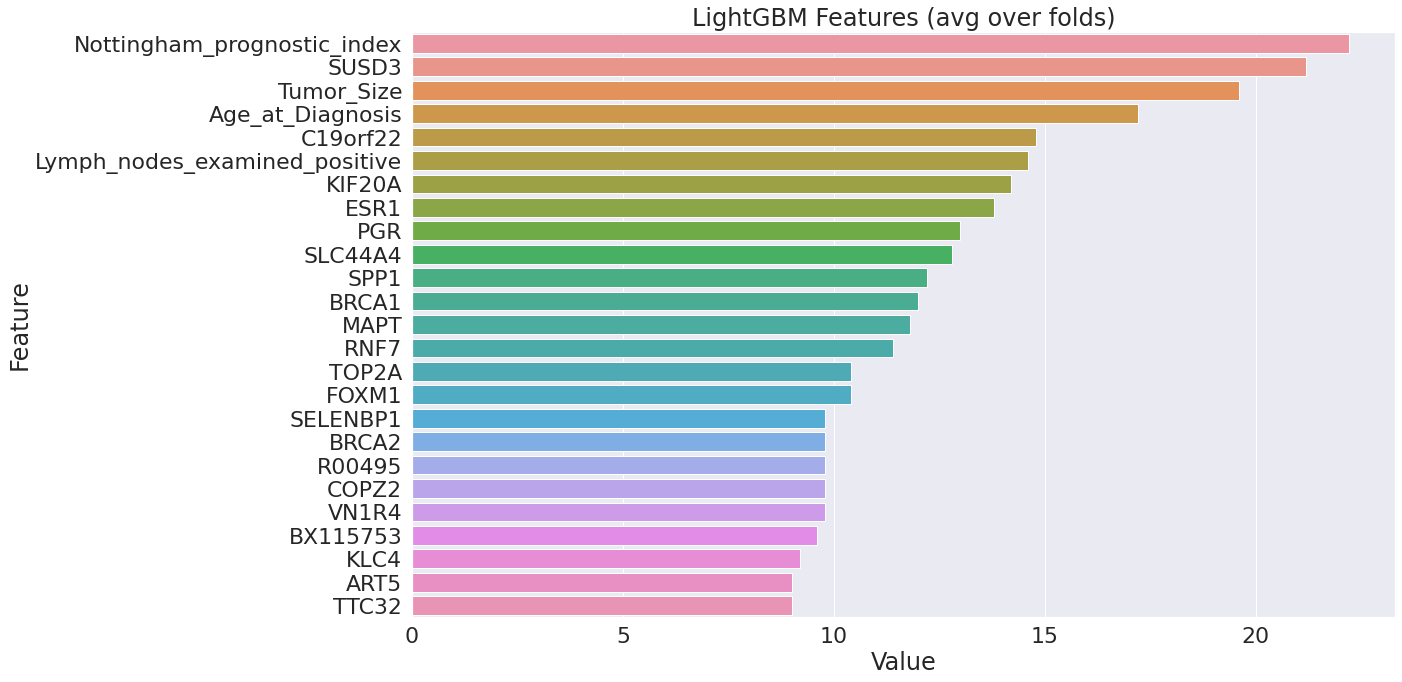

In [ ]:
x_train = train_df[bi_model]
plotImp(imp, x_train)

In [ ]:
feature_imp = pd.DataFrame({'Value':imp,'Feature':x_train.columns})
tmp = feature_imp.sort_values(by="Value",ascending=False)[:200]
tmp = [x for x in tmp.Feature.values if x in(df2.columns)]
tmp

['SUSD3',
 'C19orf22',
 'KIF20A',
 'ESR1',
 'PGR',
 'SLC44A4',
 'SPP1',
 'BRCA1',
 'MAPT',
 'RNF7',
 'TOP2A',
 'FOXM1',
 'SELENBP1',
 'BRCA2',
 'R00495',
 'COPZ2',
 'VN1R4',
 'BX115753',
 'KLC4',
 'ART5',
 'TTC32',
 'KRTAP5-6',
 'LMBR1',
 'BX113107',
 'PLAUR',
 'SERPINA11',
 'MMADHC',
 'PPAPDC1A',
 'CA12',
 'KIF7',
 'PLAU',
 'ZC3H15',
 'SULF1',
 'GRB7',
 'STARD3',
 'NUP35',
 'HS3ST4',
 'KIAA1199',
 'GATA3',
 'ANTXR1',
 'CTSL1',
 'TUBG1',
 'TJP3',
 'MFAP2',
 'MUC1',
 'MKI67IP',
 'DSE',
 'AURKB',
 'MKI67',
 'REEP6',
 'TIMELESS',
 'HJURP',
 'C17orf53',
 'LEPREL1',
 'SSB',
 'C9orf43',
 'AGR3',
 'PGAP3',
 'ERBB2',
 'COL11A1']

# gc collect

In [ ]:
import gc
gc.collect()

6672